# Reconocimiento de las señales de tráfico

In [26]:
from google.colab import files
uploaded = files.upload()

In [0]:
files.download("Nombre_archivo") # para descargar los archivos de colab

In [29]:
! git clone "https://github.com/INFINITY-RUBER/Curso_Machine_Learning_Data_Science_Python.git"

fatal: destination path 'Curso_Machine_Learning_Data_Science_Python' already exists and is not an empty directory.


In [30]:
!ls "/content/Curso_Machine_Learning_Data_Science_Python/datasets/belgian/"

Testing  Training


In [0]:
import tensorflow as tf
import os
import skimage.data as imd

import numpy as np

In [0]:
help(imd)

In [0]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.load(f))
            labels.append(int(d))
        
    return images, labels

In [0]:
#main_dir = "../datasets/belgian/"
main_dir = "/content/Curso_Machine_Learning_Data_Science_Python/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [105]:
images, labels = load_ml_data(train_data_dir)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: This function is deprecated and will be removed in 0.18. Use `skimage.io.load` or `imageio.imread` directly.
  


In [80]:
len(images)

4575

In [107]:
len(labels)

4575

In [0]:
images = np.array(images)

In [0]:
labels = np.array(labels)

In [111]:
images.size

4575

In [110]:
images.ndim

1

In [112]:
images[0]

array([[[ 85, 113, 110],
        [ 86, 113, 111],
        [ 85, 112, 110],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 84, 111, 109],
        [ 84, 111, 109],
        [ 85, 112, 110],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 82, 110, 107],
        [ 81, 109, 106],
        [ 84, 111, 109],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 84,  81,  67],
        [ 81,  81,  64],
        [ 83,  81,  65],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 88,  85,  69],
        [ 84,  85,  66],
        [ 85,  85,  66],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 90,  86,  69],
        [ 85,  87,  66],
        [ 85,  86,  65],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [113]:
labels.ndim

1

In [114]:
labels.size

4575

In [116]:
len(set(labels)) # CONTABILIZA LAS DATOS UNICOS  O EL CONJUNTO DE DATOS

62

In [117]:
images.flags # INFORMACION DE COMO A GUARDA LOS DATOS EJ: WRITEABLE : True >> son sobrescribibles

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [120]:
images.itemsize

8

In [121]:
images.nbytes

36600

In [122]:
images.nbytes/images.itemsize # sacar los Megabits que estoy usando

4575.0

In [0]:
import matplotlib.pyplot as plt

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.        ,  0.98387097,  1.96774194,  2.9516129 ,  3.93548387,
         4.91935484,  5.90322581,  6.88709677,  7.87096774,  8.85483871,
         9.83870968, 10.82258065, 11.80645161, 12.79032258, 13.77419355,
        14.75806452, 15.74193548, 16.72580645, 17.70967742, 18.69354839,
        19.67741935, 20.66129032, 21.64516129, 22.62903226, 23.61290323,
        24.59677419, 25.58064516, 26.56451613, 27.5483871 , 28.53225806,
        29.51612903, 30.5       , 31.48387097, 32.46774194, 33.4516129 ,
        34.43548387, 35.41935484, 36.40322581, 37.38709677, 38.3709

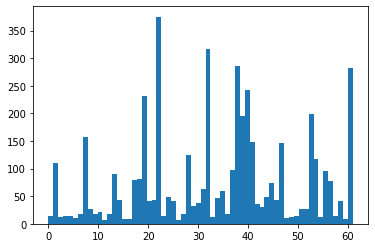

In [126]:
plt.hist(labels, len(set(labels)))
# plt.show() oculsta los datos array

In [0]:
import random

In [132]:
rand_signs = random.sample(range(0, len(labels)), 6) # una muestra aleatoria simple de 6 señales 
rand_signs

[2898, 1449, 2373, 1823, 4360, 567]

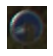

Forma:(41, 38, 3)pix, min:2, max:216


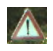

Forma:(47, 50, 3)pix, min:14, max:255


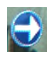

Forma:(54, 47, 3)pix, min:0, max:255


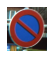

Forma:(124, 111, 3)pix, min:0, max:255


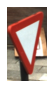

Forma:(241, 128, 3)pix, min:14, max:255


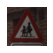

Forma:(122, 123, 3)pix, min:7, max:160


In [134]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}pix, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

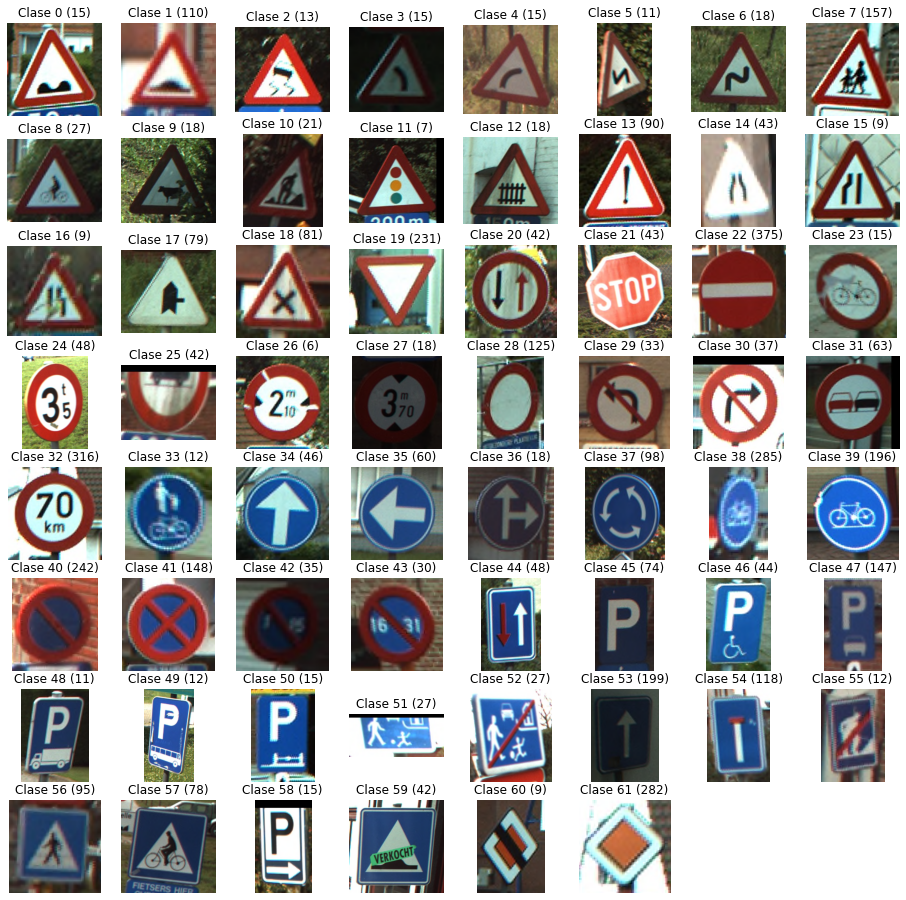

In [136]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [137]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [0]:
from skimage import transform

In [0]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [0]:
images30 = [transform.resize(image, (30,30)) for image in images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
images30[0]

array([[[0.22186275, 0.40480392, 0.4295098 ],
        [0.42978431, 0.54390196, 0.53941176],
        [0.44313725, 0.54921569, 0.53343137],
        ...,
        [0.26784314, 0.29166667, 0.2227451 ],
        [0.2385098 , 0.26913725, 0.19303922],
        [0.28131373, 0.32641176, 0.24066667]],

       [[0.21217647, 0.39062745, 0.40141176],
        [0.43011765, 0.55227451, 0.54468627],
        [0.44098039, 0.53431373, 0.49598039],
        ...,
        [0.3272549 , 0.34117647, 0.27245098],
        [0.29258824, 0.32743137, 0.24454902],
        [0.28129412, 0.32186275, 0.23892157]],

       [[0.26254902, 0.45235294, 0.47558824],
        [0.45901961, 0.58      , 0.55627451],
        [0.45882353, 0.5377451 , 0.51421569],
        ...,
        [0.35686275, 0.31421569, 0.25343137],
        [0.34009804, 0.29872549, 0.25539216],
        [0.33205882, 0.30039216, 0.27931373]],

       ...,

       [[0.39833333, 0.52656863, 0.50019608],
        [0.42921569, 0.55666667, 0.52352941],
        [0.43676471, 0

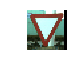

Forma:(30, 30, 3), min:0.0, max:1.0


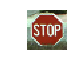

Forma:(30, 30, 3), min:0.026627450980392278, max:1.0


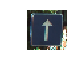

Forma:(30, 30, 3), min:0.05225490196078381, max:1.0


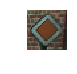

Forma:(30, 30, 3), min:0.06715686274509822, max:0.6456644880174299


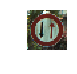

Forma:(30, 30, 3), min:0.03203921568627577, max:1.0


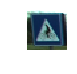

Forma:(30, 30, 3), min:0.024101307189542488, max:1.0


In [0]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [0]:
from skimage.color import rgb2gray

In [0]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

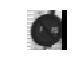

Forma:(30, 30), min:0.0, max:0.6131553464052293


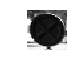

Forma:(30, 30), min:0.10036139215686302, max:0.9990383098039217


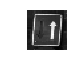

Forma:(30, 30), min:0.07573926143790845, max:0.85074481372549


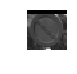

Forma:(30, 30), min:0.0, max:0.8775040408496722


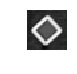

Forma:(30, 30), min:0.14224938997821343, max:0.7879190535947712


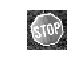

Forma:(30, 30), min:0.11080798039215436, max:0.9999073529411765


In [0]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [0]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [0]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [0]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [0]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [0]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [0]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  37.650494
EPOCH 50
Eficacia:  35.907978
EPOCH 100
Eficacia:  35.659233
EPOCH 150
Eficacia:  35.29814
EPOCH 200
Eficacia:  35.14011
EPOCH 250
Eficacia:  35.06142
EPOCH 300
Eficacia:  34.930275
EPOCH 350
Eficacia:  34.835846
EPOCH 400
Eficacia:  34.6988
EPOCH 450
Eficacia:  34.59825
EPOCH 500
Eficacia:  34.495518
EPOCH 550
Eficacia:  34.460327
EPOCH 600
Eficacia:  34.397377


# Evaluación de la red neuronal

In [0]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [0]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [0]:
prediction

array([37, 22, 22,  0, 32, 56, 47, 35, 40, 22, 38, 38,  1, 34, 56, 32, 32,
        7, 28, 61, 38, 39, 61, 37, 47, 61, 32, 38, 32, 41, 32, 39, 32, 31,
       47, 28, 40, 47, 57, 54])

In [0]:
sample_labels

[37,
 22,
 22,
 19,
 32,
 56,
 47,
 35,
 40,
 22,
 38,
 38,
 4,
 34,
 56,
 9,
 32,
 7,
 28,
 61,
 38,
 44,
 61,
 37,
 47,
 61,
 32,
 38,
 45,
 41,
 32,
 39,
 32,
 31,
 47,
 19,
 40,
 47,
 57,
 53]

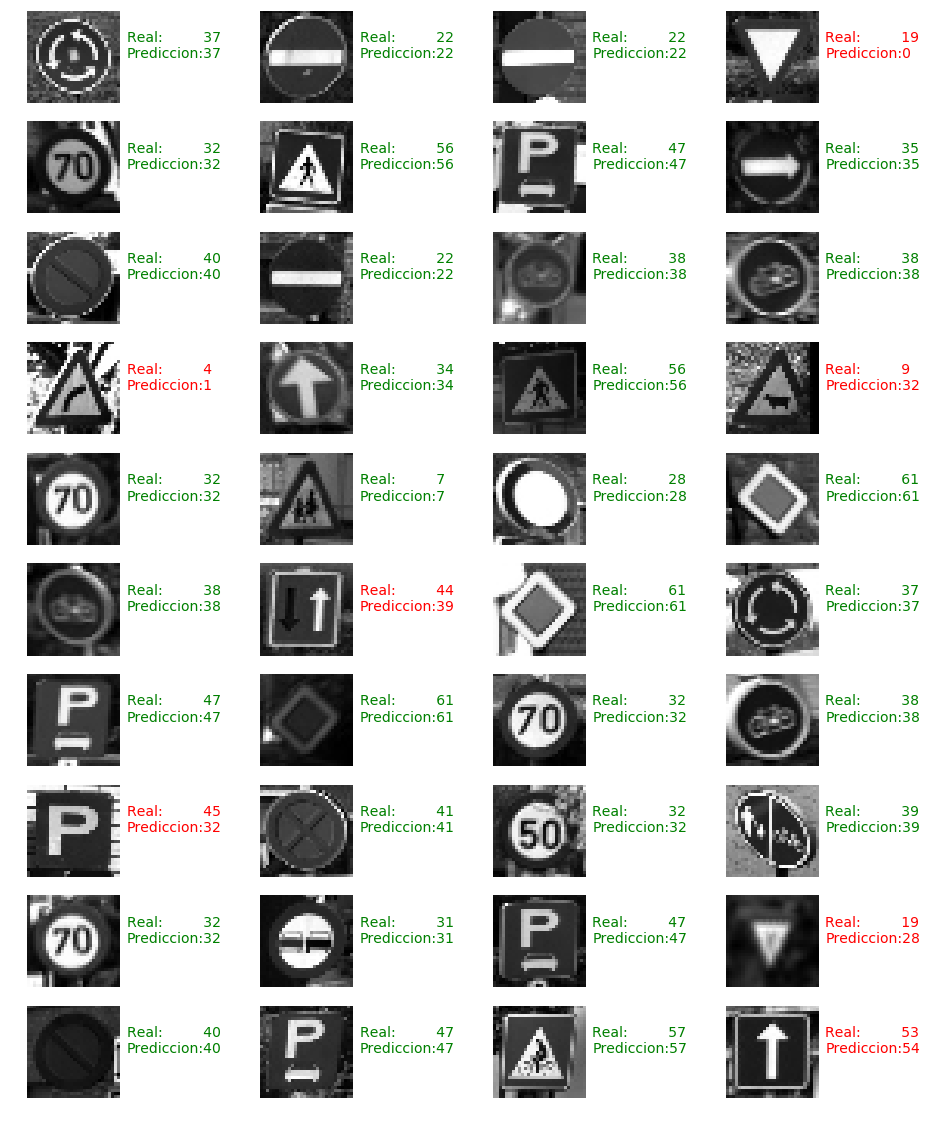

In [0]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [0]:
test_images, test_labels = load_ml_data(test_data_dir)

In [0]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
test_images30 = rgb2gray(np.array(test_images30))

In [0]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [0]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1603

In [0]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 63.61
